In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [3]:
start = '2011-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start,end)#taking value from yahoo finance website
df.head()#printing head part


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864277
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078655
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131256
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214128
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205873


In [4]:
df.tail()#printing tail part

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [5]:
df=df.reset_index()#resetting date as my index
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864277
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078655
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131256
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214128
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205873


In [6]:
df=df.drop(['Date','Adj Close'], axis=1)#removing columns that are not necessary
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


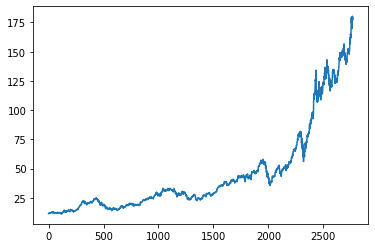

In [7]:
plt.plot(df.Close) #"to produce a simple graph showing closing price of tesla stock"

In [ ]:
df

In [ ]:
ma100=df.Close.rolling(100).mean() #"moving average of 100 days it will take 100 days closing price and it will find average"
ma100

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close) 
plt.plot(ma100,'r') #"ma100 in red colour"

In [ ]:
ma200=df.Close.rolling(200).mean() #"moving average of 200 days"
ma200

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close) 
plt.plot(ma100,'r') #"ma100 in red colour"
plt.plot(ma200,'g') #"ma200 in green colour"

In [ ]:
df.shape #"to know number of rows and columns that we have till now"

In [ ]:
# for data predictions now we will split data into training and testing and create a dataframe for both

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) #we take only 70% values of close column  
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])#we take remaining 30% values of close column 

print(data_training.shape)

print(data_testing.shape) # addition of both values will be equal to df.shape

In [ ]:
data_training.head()

In [ ]:
data_testing.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler #to ocnvert datas into scaled data
scaler=MinMaxScaler(feature_range=(0,1))# each value of closing price will be scaled between 0 and 1

In [ ]:
data_training_array=scaler.fit_transform(data_training)#converts values to array
data_training_array

In [ ]:
data_training_array.shape

In [ ]:
x_train=[] #100 days are going to be x train example of 10 days
y_train=[] #101th day is going to be y train
#as closing price of last day will be dependent on values of previous days

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
x_train, y_train=np.array(x_train),np.array(y_train) #converting x train and y train into numpy arrays so that we can provide data to LSTM
    
   

In [ ]:
x_train.shape

In [ ]:
#now we make Machine learnong model

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential() #we have four layers in our LSTM model
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1))) #we are working only with 1 close columnn so it is 1 in second argument
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))# Dense layer to connect all these layers


In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')# we are doing time series analysis so we use mean squared error
model.fit(x_train,y_train,epochs=50)

In [ ]:
model.save('keras_model.h5')

In [ ]:
#Now we are predicting the data,we take value from testing data and last 100 values from training data
data_testing.head()

In [ ]:
data_training.tail(100)

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()#rows are not scaled

In [ ]:
input_data=scaler.fit_transform(final_df)#we scale the rows between 0 and 1
input_data

In [ ]:
input_data.shape

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


In [ ]:
#Making predictions

y_predicted=model.predict(x_test)
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label= 'Original Price')
plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()